In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [2]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset['DESCR'])


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [3]:
# Save the input and target variables

print(diabetes_dataset.keys())

data = diabetes_dataset["data"]
target = diabetes_dataset["target"]

target

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [4]:
# Normalise the target data (this will make clearer training curves)

target = (target - target.mean())/target.std()
target 


array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

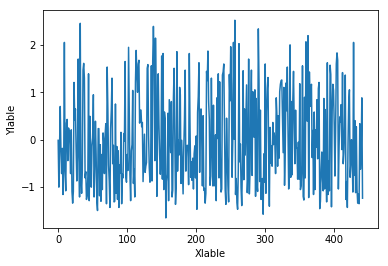

In [7]:
# plot the normalized data of 'target'

import matplotlib.pyplot as plt
import numpy as np

plt.plot(target)
plt.xlabel('Xlable')
plt.ylabel('Ylable')
plt.show()


In [5]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size = 0.1)

print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(397, 10)
(45, 10)
(397,)
(45,)


#### Train a feedforward neural network model

In [6]:
# Build the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation = 'relu', input_shape=(train_data.shape[1],)),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(1)
    ])
    return model

model = get_model()

In [7]:
# Print the model summary

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [8]:
# Compile the model

model.compile(optimizer = 'adam',
              loss = 'mse',
              metrices = 'mae'
             )

In [12]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_target, epochs = 20, validation_split = 0.15, batch_size = 64)

Train on 337 samples, validate on 60 samples
Epoch 1/20
337/337 [==============================] - 2s 6ms/sample - loss: 0.9703 - val_loss: 0.9814
Epoch 2/20
337/337 [==============================] - 0s 614us/sample - loss: 0.8962 - val_loss: 0.8423
Epoch 3/20
337/337 [==============================] - 0s 593us/sample - loss: 0.7023 - val_loss: 0.6016
Epoch 4/20
337/337 [==============================] - 0s 589us/sample - loss: 0.5285 - val_loss: 0.5416
Epoch 5/20
337/337 [==============================] - 0s 607us/sample - loss: 0.4965 - val_loss: 0.5146
Epoch 6/20
337/337 [==============================] - 0s 591us/sample - loss: 0.4830 - val_loss: 0.4781
Epoch 7/20
337/337 [==============================] - 0s 603us/sample - loss: 0.4527 - val_loss: 0.5450
Epoch 8/20
337/337 [==============================] - 0s 852us/sample - loss: 0.4631 - val_loss: 0.4876
Epoch 9/20
337/337 [==============================] - 0s 598us/sample - loss: 0.4557 - val_loss: 0.4971
Epoch 10/20
337/337 [

In [13]:
# Evaluate the model on the test set

model.evaluate(test_data, test_target, verbose = 2)


45/1 - 0s - loss: 0.5034


0.6405476702584161

#### Plot the learning curves

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

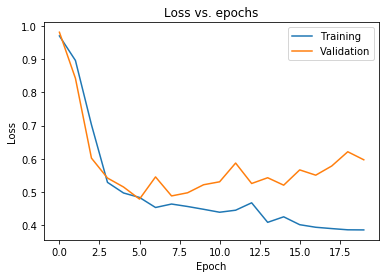

In [15]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [9]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [10]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu", input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [11]:
# Re-build the model with weight decay and dropout layers

model = get_regularised_model(1e-5, 0.3)

In [22]:
# Compile the model

model.compile(optimizer = 'adam',
             loss = 'mse',
             metrics = ['mae'])


In [23]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_target, epochs = 100, validation_split=0.15, batch_size=64)

Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 [==============================] - 2s 6ms/sample - loss: 0.9875 - mae: 0.8453 - val_loss: 1.0122 - val_mae: 0.8370
Epoch 2/100
337/337 [==============================] - 0s 583us/sample - loss: 0.9662 - mae: 0.8379 - val_loss: 0.9676 - val_mae: 0.8180
Epoch 3/100
337/337 [==============================] - 0s 607us/sample - loss: 0.9071 - mae: 0.8125 - val_loss: 0.8497 - val_mae: 0.7719
Epoch 4/100
337/337 [==============================] - 0s 581us/sample - loss: 0.7575 - mae: 0.7341 - val_loss: 0.6703 - val_mae: 0.6744
Epoch 5/100
337/337 [==============================] - 0s 597us/sample - loss: 0.6492 - mae: 0.6665 - val_loss: 0.6425 - val_mae: 0.6461
Epoch 6/100
337/337 [==============================] - 0s 599us/sample - loss: 0.6230 - mae: 0.6362 - val_loss: 0.5517 - val_mae: 0.6048
Epoch 7/100
337/337 [==============================] - 0s 588us/sample - loss: 0.6149 - mae: 0.6292 - val_loss: 0.5574 - val_mae: 0.625

In [24]:
# Evaluate the model on the test set

model.evaluate(test_data, test_target, verbose = 2)

45/1 - 0s - loss: 0.4516 - mae: 0.6067


[0.5246233880519867, 0.6066817]

#### Plot the learning curves

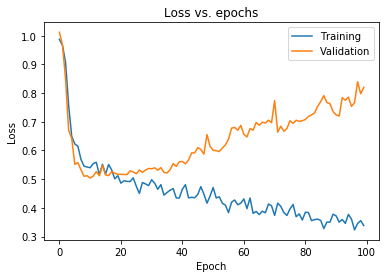

In [25]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [41]:
# Write a custom callback

from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
    
    def on_train_begin(self, logs = None):
        print("Starting training...")
        
    def on_epoch_begin(self, epoch, logs = None):
        print(f"Starting epoch {epoch}")
    
    def on_train_batch_begin(self, batch, logs = None):
        print(f"Training: Starting batch {batch}")
        
    def on_train_batch_end(self, batch, logs = None):
        print(f"Training: Finished batch {batch}")
        
    def on_epoch_end(self, epoch, logs = None):
        print(f"Finished epoch {epoch}")
    
    def on_train_end(self, logs = None):
        print("Finshed training!")


In [42]:
# Re-build the model

model = get_regularised_model(1e-5, 0.3)

In [43]:
# Compile the model

model.compile(optimizer = 'adam',
             loss = 'mse')

#### Train the model with the callback

In [44]:
# Train the model, with some of the data reserved for validation

model.fit(train_data, train_target, epochs = 3, batch_size = 128, callbacks = [TrainingCallback()])

Train on 397 samples
Starting training...
Starting epoch 0
Epoch 1/3
Training: Starting batch 0
Training: Finished batch 0
128/397 [========>.....................] - ETA: 3s - loss: 0.9457Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
384/397 [============================>.] - ETA: 0s - loss: 1.0276Training: Starting batch 3
Training: Finished batch 3
Finished epoch 0
397/397 [==============================] - 2s 5ms/sample - loss: 1.0240
Starting epoch 1
Epoch 2/3
Training: Starting batch 0
Training: Finished batch 0
128/397 [========>.....................] - ETA: 0s - loss: 1.0839Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
384/397 [============================>.] - ETA: 0s - loss: 1.0107Training: Starting batch 3
Training: Finished batch 3
Finished epoch 1
397/397 [==============================] - 0s 493us/sample - loss: 1.0171
Starting epoch 2
Epoch 3/3
Train

In [45]:
# Write a custom testing callback

from tensorflow.keras.callbacks import Callback

class TestingCallback(Callback):
    
    def on_test_begin(self, logs = None):
        print("Starting testing...")     
    
    def on_test_batch_begin(self, batch, logs = None):
        print(f"Testing: Starting batch {batch}")
        
    def on_test_batch_end(self, batch, logs = None):
        print(f"Testing: Finished batch {batch}")
    
    def on_test_end(self, logs = None):
        print("Finshed testing!")


In [46]:
# Evaluate the model

model.evaluate(test_data, test_target, callbacks = [TestingCallback()], verbose = 2)

Starting testing...
Testing: Starting batch 0
Testing: Finished batch 0
Testing: Starting batch 1
Testing: Finished batch 1
45/1 - 0s - loss: 1.0574
Finshed testing!


0.8533161401748657

In [47]:
# Write a custom prediction callback

from tensorflow.keras.callbacks import Callback

class PredictionCallback(Callback):
    
    def on_predict_begin(self, logs = None):
        print("Starting prediction...")     
    
    def on_predict_batch_begin(self, batch, logs = None):
        print(f"Prediction: Starting batch {batch}")
        
    def on_predict_batch_end(self, batch, logs = None):
        print(f"Prediction: Finished batch {batch}")
    
    def on_predict_end(self, logs = None):
        print("Finshed prediction!")


In [49]:
# Make predictions with the model

model.predict(test_data, verbose =2, callbacks = [PredictionCallback()])

Starting prediction...
Prediction: Starting batch 0
Prediction: Finished batch 0
Prediction: Starting batch 1
Prediction: Finished batch 1
45/1 - 0s
Finshed prediction!


array([[0.00816938],
       [0.04154014],
       [0.0297704 ],
       [0.05223765],
       [0.03092851],
       [0.01888221],
       [0.00789596],
       [0.03080745],
       [0.01873691],
       [0.01738143],
       [0.04313523],
       [0.09152647],
       [0.05752211],
       [0.06276052],
       [0.0465243 ],
       [0.00377789],
       [0.03704588],
       [0.09330441],
       [0.0347306 ],
       [0.06058391],
       [0.01939713],
       [0.06407343],
       [0.0579199 ],
       [0.07472275],
       [0.01621364],
       [0.01467126],
       [0.0211934 ],
       [0.05517456],
       [0.10692474],
       [0.00537521],
       [0.00461022],
       [0.07915086],
       [0.07822065],
       [0.09695481],
       [0.0631071 ],
       [0.06381067],
       [0.04363045],
       [0.04968356],
       [0.00620001],
       [0.01130144],
       [0.05645014],
       [0.07120457],
       [0.11101899],
       [0.04197528],
       [0.01672124]], dtype=float32)

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [35]:
# Re-train the unregularised model

unregularised_model = get_model()
unregularised_model.compile(optimizer = 'adam',
                           loss = 'mse')
unreg_history = unregularised_model.fit(train_data, train_target, epochs = 100, 
                                        validation_split = 0.15, batch_size = 64,
                                       callbacks = [tf.keras.callbacks.EarlyStopping(patience = 2)])

Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 [==============================] - 2s 5ms/sample - loss: 0.9901 - val_loss: 0.8526
Epoch 2/100
337/337 [==============================] - 0s 579us/sample - loss: 0.8951 - val_loss: 0.7634
Epoch 3/100
337/337 [==============================] - 0s 345us/sample - loss: 0.6859 - val_loss: 0.8000
Epoch 4/100
337/337 [==============================] - 0s 349us/sample - loss: 0.5188 - val_loss: 0.8455


In [16]:
# Evaluate the model on the test set

unregularised_model.evaluate(test_data, test_target, verbose =2)

45/1 - 0s - loss: 0.7101


0.7511086781819661

In [34]:
# Re-train the regularised model

regularised_model = get_regularised_model(1e-8, 0.2)
regularised_model.compile(optimizer = 'adam',
                         loss = 'mse')
reg_history = regularised_model.fit(train_data, train_target, epochs = 100, 
                                        validation_split = 0.15, batch_size = 64,
                                       callbacks = [tf.keras.callbacks.EarlyStopping(patience = 2)])

Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 [==============================] - 2s 6ms/sample - loss: 0.9977 - val_loss: 0.8646
Epoch 2/100
337/337 [==============================] - 0s 574us/sample - loss: 0.9481 - val_loss: 0.7951
Epoch 3/100
337/337 [==============================] - 0s 599us/sample - loss: 0.8081 - val_loss: 0.7413
Epoch 4/100
337/337 [==============================] - 0s 839us/sample - loss: 0.6029 - val_loss: 0.7767
Epoch 5/100
337/337 [==============================] - 0s 597us/sample - loss: 0.5394 - val_loss: 0.8207


In [19]:
# Evaluate the model on the test set

regularised_model.evaluate(test_data, test_target, verbose=2)

45/1 - 0s - loss: 0.7076


0.7631201214260526

#### Plot the learning curves

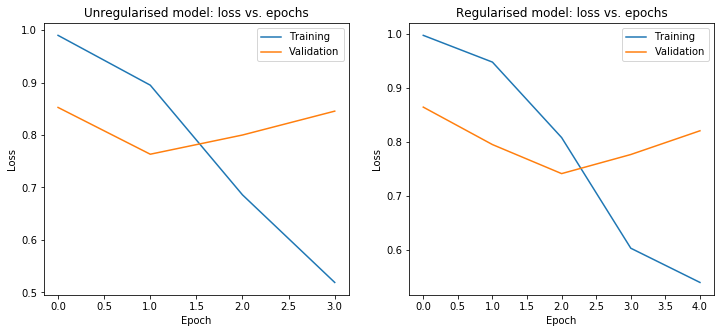

In [36]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()